In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('winequalityN.csv')

In [3]:
wine        

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

## Limpieza de variables

In [4]:
# Reemplazando valores nulos por la media

wine.isnull().sum()
for col in wine.columns:
  if wine[col].isnull().sum() > 0:
    wine[col] = wine[col].fillna(wine[col].mean())

wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

c:\Users\Angel\.conda\envs\ia\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


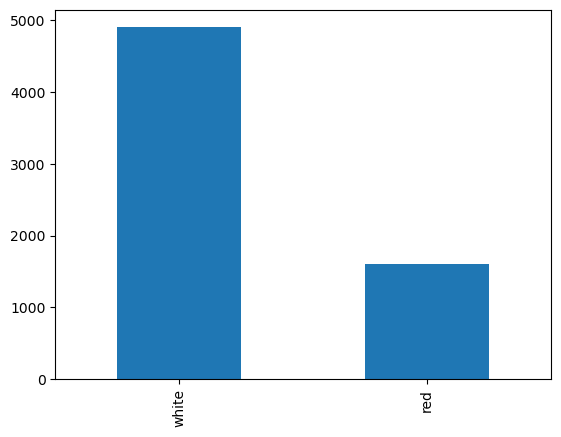

In [5]:
# Estratificacion de datos (usando columna type)
import matplotlib.pyplot as plt
import seaborn as sns

wine["type"].value_counts().plot(kind="bar")
plt.show()



No se estratifica, ya que solo son dos tipos de vino, y no hay una gran diferencia entre ellos.

Limpieza de datos (remplazar valores atipicos con la media en cada una de las columnas)

Upper bound:  0.6000000000000001
Lower bound:  0.03999999999999998


14      0.62
65      0.03
84      0.61
85      0.62
86      0.63
        ... 
6455    0.02
6463    0.02
6464    0.64
6472    0.78
6474    0.63
Name: citric acid, Length: 508, dtype: float64

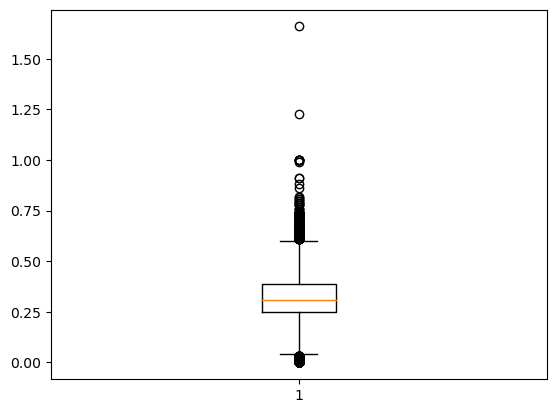

In [6]:
# Encontrar valores atipicos usando IQR
vectorCA = wine["citric acid"]
Q1 = vectorCA.quantile(0.25)
Q3 = vectorCA.quantile(0.75)
IQR = Q3 - Q1
plt.boxplot(vectorCA)
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
print("Upper bound: ", upper_bound)
print("Lower bound: ", lower_bound)
# Mostrar valores atipicos
vectorCA[(vectorCA > upper_bound) | (vectorCA < lower_bound)]


In [7]:
#vectores que corresponden a cada columna del dataset
vectorFA = wine["fixed acidity"]
vectorVA = wine["volatile acidity"]
vectorCA = wine["citric acid"]
vectorRS = wine["residual sugar"]
vectorCH = wine["chlorides"]
vectorFS = wine["free sulfur dioxide"]
vectorTS = wine["total sulfur dioxide"]
vectorD = wine["density"]
vectorPH = wine["pH"]
vectorS = wine["sulphates"]
vectorA = wine["alcohol"]
vectorQ = wine["quality"]

In [8]:
# Funcion para encontrar valores atipicos y reemplazarlos por la media
def atipicos_a_media(vector):
    Q1 = vector.quantile(0.25)
    Q3 = vector.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)
    for i in range(len(vector)):
        if vector[i] > upper_bound or vector[i] < lower_bound:
            vector[i] = vector.mean()
    return vector

In [9]:
# Reemplazar valores atipicos por la media
atipicos_a_media(vectorVA)
atipicos_a_media(vectorRS)
atipicos_a_media(vectorCH)
atipicos_a_media(vectorFS)
atipicos_a_media(vectorTS)
atipicos_a_media(vectorD)
atipicos_a_media(vectorS)
atipicos_a_media(vectorA)
atipicos_a_media(vectorQ)
atipicos_a_media(vectorFA)
atipicos_a_media(vectorCA)
atipicos_a_media(vectorPH)



C:\Users\Angel\AppData\Local\Temp\ipykernel_10088\3712368282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vector[i] = vector.mean()


0       3.00
1       3.30
2       3.26
3       3.19
4       3.19
        ... 
6492    3.45
6493    3.52
6494    3.42
6495    3.57
6496    3.39
Name: pH, Length: 6497, dtype: float64

c:\Users\Angel\.conda\envs\ia\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


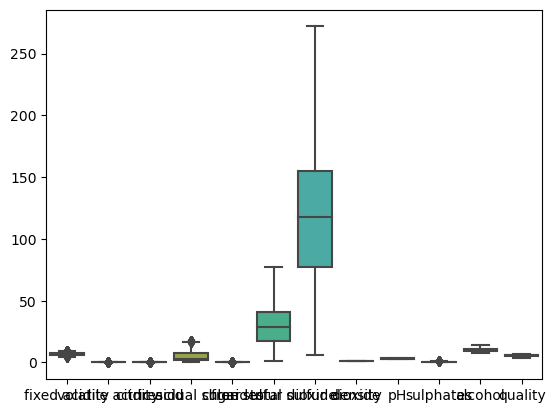

In [10]:
sb = sns.boxplot(wine)

In [11]:
#Dataset limpio
wine.to_csv('winequality_clean.csv', index=False)

